<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gas processing, weather and climate data
Climate conditions can impact energy consumption patterns, particularly in regions with high heating or cooling demands. For instance, during cold spells, increased heating requirements may raise the demand for natural gas as a fuel, potentially affecting the availability of natural gas for processing purposes.

Could temperatures can have an positive effect of power production in gas turbines and colder cooling media (wate, air) is positive fo compressor efficiency. In cold weather, natural gas becomes denser, which increases the mass of gas flowing into the compressor. As a result, the compressor may need to work harder to handle the higher gas density, leading to increased power requirements and reduced efficiency.

This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).

#Litterature and tools

https://dev.meteostat.net/



In [1]:
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


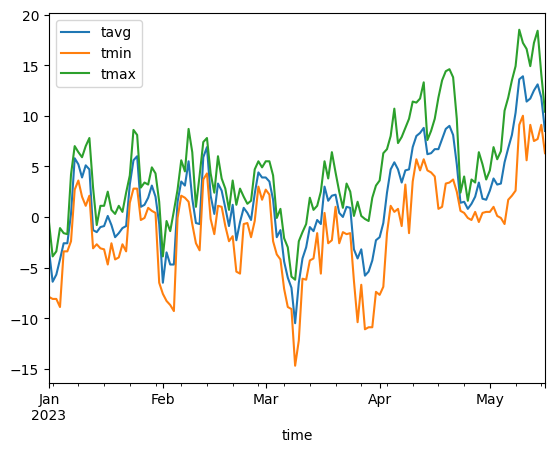

In [14]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 5, 16)

# Create Point for Trondheim, BC
trondheim = Point(63.446827, 10.421906, 70)

# Get daily data
data = Daily(trondheim, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [8]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-01-01,-3.3,-7.9,-0.5,0.3,0.0,199.0,14.4,41.8,1003.5,NaN
2023-01-02,-6.4,-8.1,-3.9,0.0,0.0,185.0,10.6,29.9,1010.5,NaN
2023-01-03,-5.7,-8.1,-3.4,0.0,0.0,171.0,9.1,20.2,1017.5,NaN
2023-01-04,-4.2,-8.9,-1.1,0.0,0.0,120.0,12.4,37.1,1012.1,NaN
2023-01-05,-2.6,-3.4,-1.6,0.0,0.0,149.0,26.7,68.0,1012.8,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-12,11.7,9.1,14.9,0.0,NaN,206.0,6.7,22.7,1026.7,NaN
2023-05-13,12.5,7.5,17.2,0.0,NaN,337.0,7.2,23.4,1026.3,NaN
2023-05-14,13.1,7.7,18.4,0.0,NaN,124.0,8.5,36.7,1018.5,NaN


#Check nearby weather stations

In [16]:
# Import Meteostat library
from meteostat import Stations

trondheim = Point(63.446827, 10.421906, 70)

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(63.446827, 10.421906)
station = stations.fetch(1)

# Print DataFrame
print(station)

                     name country region    wmo  icao  latitude  longitude  \
id                                                                           
01257  Trondheim / Høiset      NO     ST  01257  <NA>   63.4106    10.4539   

       elevation     timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                             
01257      127.0  Europe/Oslo   2004-04-06 2023-03-24  2006-02-17 2021-08-22   

      monthly_start monthly_end     distance  
id                                            
01257    2010-01-01  2017-01-01  4331.192651  


#Hourly daata

In [21]:
# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2023, 5, 1)
end = datetime(2023, 5, 13, 23, 59)

# Get hourly data from Tromndheim based on station ID
data = Hourly('01257', start, end)
data = data.fetch()

# Print DataFrame
print(data)

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2023-05-01 00:00:00   1.2  -1.2  84.0   0.0   NaN  219.0  17.6  32.4  1013.3   
2023-05-01 01:00:00   1.0  -1.4  84.0   0.0   NaN  215.0  19.1  34.6  1012.8   
2023-05-01 02:00:00   0.5  -1.9  84.0   0.0   NaN  213.0  17.6  34.9  1012.2   
2023-05-01 03:00:00   0.2  -2.2  84.0   0.0   NaN  212.0  17.6  33.1  1011.6   
2023-05-01 04:00:00   1.5  -1.2  82.0   0.0   NaN  211.0  16.6  30.6  1011.0   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2023-05-13 19:00:00  14.0   8.6  70.0   0.0   NaN  310.0   7.2  15.8  1024.3   
2023-05-13 20:00:00  12.1   8.6  79.0   0.0   NaN  316.0   4.0  13.7  1024.3   
2023-05-13 21:00:00  10.5   8.1  85.0   0.0   NaN  194.0   3.6   6.8  1024.0   
2023-05-13 22:00:00   9.5   7.4  87.0   0.0   NaN  168.0   6.5  11.5  1023.7   
2023-05-13 23:00:00   8.8   7.2  90.0   

# Power production and effect of air temperature

In [9]:
!pip install neqsim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.9 MB/s eta 0:00:00


In [13]:
from neqsim.thermo import fluid, TPflash,printFrame
from neqsim.standards import ISO6976


fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", 0.72)
fluid1.addComponent("oxygen", 0.28)

TPflash(fluid1)

printFrame(fluid1)


| 0                  | 1          | 2          | 3   | 4   | 5   | 6               |
|:-------------------|:-----------|:-----------|:----|:----|:----|:----------------|
|                    | total      | gas        |     |     |     |                 |
| nitrogen           | 7.2E-1     | 7.2E-1     |     |     |     | [mole fraction] |
| oxygen             | 2.8E-1     | 2.8E-1     |     |     |     | [mole fraction] |
|                    |            |            |     |     |     |                 |
| Density            |            | 1.19091E0  |     |     |     | [kg/m^3]        |
| PhaseFraction      |            | 1E0        |     |     |     | [mole fraction] |
| MolarMass          | 2.91294E1  | 2.91294E1  |     |     |     | [kg/kmol]       |
| Z factor           |            | 9.99809E-1 |     |     |     | [-]             |
| Heat Capacity (Cp) |            | 1.00416E0  |     |     |     | [kJ/kg*K]       |
| Heat Capacity (Cv) |            | 7.17259E-1 |     |     |     